<img src="../images/cads-logo.png" style="height: 100px;" align=left> 
<img src="../images/python-logo.png" style="height: 100px;" align=right>

# Statistical Data Analysis
Day 2.2

## Content Outline 
1. [t-distribution](#tdist)
2. [Inference](#inference)
    * [A. Point Estimation](#pointest)
    * [B. Interval Estimation](#intest)
    * [C.  Hypothesis testing](#hypothesis) 
3. [One-sample hypothesis tests](#onesample) 
    * [One-sample test for proportions](#onesampleprop)
    * [One-sample test for means](#onesamplemean)
4. [Two-sample hypothesis tests](#twosample)
    * [C ---> Q](#ctoq)
        * Unpaired two-sample test for proportions
        4. [Unpaired two-sample test for means](#twosampletunpairedmeans)
        5. [Paired two-sample test](#twosampletpaired)
5. [Two (or more) sample hypothesis tests](#ntests)
    - [C ---> Q](#ctoqn)
        - [One-way ANOVA](#anova)
    - [C ---> C](#ctoc)
        - [Chi-square test for independence](#chisq)

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from scipy.stats import norm 

# 1. t-distribution<a name="tdist"></a>

We have seen that random variables can be visually modeled by many different sorts of shapes, and we call these shapes distributions. Several distributions arise so frequently that they have been given special names, and they have been studied mathematically. 

The **t-distribution** is another bell-shaped (unimodal and symmetric) distribution, like the normal distribution; and the center of the t-distribution is standardized at zero, like the center of the standard normal distribution which we call it z-distribution as well.

Like all distributions that are used as probability models, the normal and the t-distribution are both scaled, so the total area under each of them is 1.

So how is the t-distribution fundamentally different from the normal distribution? The **spread**.

The following picture illustrates the fundamental difference between the normal distribution and the t-distribution:

<img src='../images/tDist.jpg'>

The t-distribution has slightly less area near the expected central value than the normal distribution does, and has correspondingly more area in the "tails" than the normal distribution does. (It’s often said that the t-distribution has "fatter tails" or "heavier tails" than the normal distribution.)

This reflects the fact that the t-distribution has a larger spread than the normal distribution. The same total area of 1 is spread out over a slightly wider range on the t-distribution, making it a bit lower near the center compared to the normal distribution, and giving the t-distribution slightly more probability in the ‘tails’ compared to the normal distribution.

Therefore, the t-distribution ends up being the appropriate model in certain cases where there is more variability than would be predicted by the normal distribution. 



There’s actually an entire family of t-distributions. They all have similar formulas (but the math is beyond the scope of this introductory course in statistics), and they all have slightly "fatter tails" than the normal distribution. But some are closer to normal than others. The t-distributions that are closer to normal are said to have higher "degrees of freedom" (that’s a mathematical concept that we won’t use in this course, beyond merely mentioning it here). So, there’s a t-distribution "with one degree of freedom," another t-distribution "with 2 degrees of freedom" which is slightly closer to normal, another t-distribution "with 3 degrees of freedom." which is a bit closer to normal than the previous ones, and so on.

The following picture illustrates this idea with a few t-distributions (note that “degrees of freedom” is shown by $\nu$):

<img src='../images/Student_t_pdf.png'>

# 2. Inference<a name="inference"></a>


Our ultimate goal in statistical data analysis is using a sample to make inferences or draw conclusions about the population from which it was drawn.<br><br>
<img src='../images/BigPic.png'><br><br>
Our choice of the type of inference depends on the type of the variable of interest.
We introduce three forms of statistical inference in this unit, each one representing a different way of using the information obtained in the sample to draw conclusions about the population. These forms are:
* Point estimation
* Interval estimation
* Hypothesis testing

## A. Point Estimation <a name="pointest"></a>
We estimate an unknown parameter using a **single number** that is calculated from the sample data.

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
Based on sample results, we estimate that $p$, the proportion of Malaysian adults who are in favor of increasing taxes on tobacco products, is 0.6.
    </div>

## B. Interval Estimation <a name="intest"></a>
We estimate an unknown parameter using an **interval of values** that is likely to contain the true value of that parameter and state how confident we are that this interval indeed captures the true value of the parameter. 

Confidence intervals are not perfect. A 95% confidence interval implies that in repeated samples, 19 in 20 confidence intervals will capture the value of the population parameter.

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
Based on sample results, we are 95% confident that $p$, the proportion of Malaysian adults who are in favor of increasing taxes on tobacco products, is between 0.57 and 0.63. 
    </div>

### B.1- Interval Estimation for Population Proportion (Categorical Variable)

Suppose we are interested in the population proportion of a categorical variable. 

* **Step 1**: We collect data from a sample of our population of size  $n$
* **Step 2**: The values of $\hat p$ follow a normal distribution with (unknown) mean $p$ and standard deviation $\sqrt{\frac {{\hat p }(1-{\hat p})}{n}}$. As we do not know the population proportion $p$, we use the sample proportion $\hat p$. 
* **Step 3**:  According to the Standard Deviation Rule, this means that:
    * We are 95% confident that the population proportion $p$ falls within $2*\sqrt{\frac {{\hat p }(1-{\hat p})}{n}}$ of our estimate $\hat p$.
    * A 95% confidence interval for the population proportion $p$ is:
$$\left(\hat p - 2*\sqrt{\frac {{\hat p }(1-{\hat p})}{n}}, \hat p + 2*\sqrt{\frac {{\hat p }(1-{\hat p})}{n}}\right)$$

Here, then, is the general result:

**Suppose a random sample of size n is taken from a population for a categorical variable whose proportion (p) is unknown. A 95% confidence interval (CI) for p is: $$\left(\hat p - 2*\sqrt{\frac {{\hat p }(1-{\hat p})}{n}}, \hat p + 2*\sqrt{\frac {{\hat p }(1-{\hat p})}{n}}\right)$$**

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
A few days before a snap election, a polling organisation would like to estimate $p$, the proportion of eligible voters who support Candidate A. They choose a random sample of size 1000 and recorded their opinion. $71\%$ of the sample support this candidate. How do you estimate the proportion of the people in the constituency who will vote for this candidate?

**Point estimate:**  $\hat p = 71\%$<br>

**Interval estimate:** According to the *central limit theorem*, sample proportion, $\hat p$, follows the normal distribution $$\hat p \sim Normal\left(mean=p, sd=\sqrt{\frac {{\hat p }(1-{\hat p})}{n}}\right)$$

So, we can say $\bar p$ follows the normal distribution $$Normal\left(mean=p , sd=\sqrt{\frac {{0.71}(1-{0.71})}{1000}}\right)$$
$$Normal(mean=p, sd=0.014)$$
where $p$ is the population proportion. 
Therefore, we can say that 
* there is 95% chance that $p$ falls within 2$\sigma_{\bar p}$ of $\hat p$. 
* Using the empirical rule, we can say the 95% confidence interval for $p$ is $({\hat p}-2\sigma_{\bar p} , {\hat p}+2\sigma_{\bar p}) = (0.71-2*0.014, 0.71+2*0.014) = (0.68, 0.73)$, where $\sigma_{\bar p}=\sqrt{\frac {\hat p(1-{\hat p})}{n}}$. 
* This means that we are 95% confident that $p$ lies within the interval (0.68, 0.73).
</div>

<div class = "alert alert-block alert-warning">
<b>Exercise</b>
<p>
Several public health researchers conducted a study to look at the connection between watching actors smoking in movies and initialising of smoking among adolescents. In the study, 6,522 teenagers aged 10-14 who had never tried smoking were randomly selected. Of those who subsequently tried smoking for the first time, 38% were exposed to smoking in the movies.

- A. Estimate the proportion of all U.S. adolescents ages 10-14 who started smoking after seeing actors smoke in movies by constructing a 95% confidence interval.
- B. Construct a 99.7% confidence interval for $p$. 
</div>

In [4]:
#MC
#Type your answer here.

n, p_hat = 6522, 0.38

#A. 
print('a.  Population proportion estimate by 95% confidence interval: (', 
      round(p_hat-2*((p_hat*(1-p_hat)/n)**.5),4), ', ', round(p_hat+2*((p_hat*(1-p_hat)/n)**.5),4), ')')
#B. 
print('\nb.  Population proportion estimate by 99.7% confidence interval: (', 
      round(p_hat-3*((p_hat*(1-p_hat)/n)**.5),4), ', ', round(p_hat+3*((p_hat*(1-p_hat)/n)**.5),4), ')')

a.  Population proportion estimate by 95% confidence interval: ( 0.368 ,  0.392 )

b.  Population proportion estimate by 99.7% confidence interval: ( 0.362 ,  0.398 )


### B.2- Interval Estimation for Population Mean (Numerical Variable)

Suppose we are interested in the mean of a numerical variable from a population. We assume the population standard deviation ($\sigma$) is known. 

* **Step 1:** We collect data from a sample of our population of size $n$
* **Step 2:** The values of $\bar x$ follow a normal distribution with (unknown) mean $\mu$ and standard deviation $\sigma_{\bar x}=\frac{\sigma}{\sqrt n}$ (known, since both $\sigma$ and $n$ are known). 
* **Step 3:** According to the Standard Deviation Rule, this means that:
    * There is a 95% chance that our population mean $\mu$ will fall within $2*\frac{\sigma}{\sqrt n}$ of $\hat \mu$
    * A 95% confidence interval for the population mean $\mu$ is:

$$\left(\bar x - 2* \frac{\sigma}{\sqrt n}, \bar x + 2* \frac{\sigma}{\sqrt n}\right)$$

Here, then, is the general result:

**Suppose a random sample of size n is taken from a normal population of values for a quantitative variable whose mean ($\mu$) is unknown, when the standard deviation ($\sigma$) is given. A 95% confidence interval (CI) for $\mu$ is: $$\left(\bar x - 2* \frac{\sigma}{\sqrt n}, \bar x + 2* \frac{\sigma}{\sqrt n}\right)$$**

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
    <b>Numerical Variable Mean</b>: Suppose we are interested in studying the average IQ of students in a university. To do so, we collect a random sample of size 100 from the students in this university. Assume the mean of the IQ level of these students is 115, and its standard deviation is $\sigma=5$. What is $\mu$, the mean of the IQ level of the population which is the whole students at this university?

> **Point estimate:**  $\hat \mu= 115$<br>
> **Interval estimate:** $\hat \mu=115, \sigma=5, n=100$.<br>
> * Note that $\frac{5}{\sqrt{100}}$ is the standard deviation of the sampling distribution of sample estimates $\bar x$ - the *standard error*, $\sigma_{\bar x}$. 
> * According to the *central limit theorem*, the distribution of the sample means $\bar x$(s) follows a normal distribution:  
> $$\bar x \sim Normal(mean=\mu, sd=\frac{\sigma}{\sqrt{n}})$$ 
> * Since $\hat \mu$ is our estimate of $\mu$, the sample means are distributed as $$\bar x\sim Normal(115, 0.5)$$
> * Recall the standard deviation rule: 
<img src='../images/IQ.png'>

Since two standard errors = 1, the statement:
> "There is a **95% chance** that the sample mean $\bar x$ falls within 1 unit of $\mu$". 

can be rephrased as: 
> "We are 95% confident that the population mean $\mu$ falls within 1 units of $\bar x$".

Given a sample mean of $\bar x=115$, we can be **95% confident** that $\mu$ falls within 1 unit of 115, or in other words that $\mu$ is covered by the interval $(115 - 1, 115 + 1) = (114,116)$.

<div class = "alert alert-block alert-warning">
<b>Exercise</b>
<p>
An educational researcher was interested in estimating $\mu$, the mean score on the total SAT scores of all college students in a state. To this end, the researcher has chosen a random sample of 650 college students from his state, and found that their average SAT score is 1425. Based on a large body of research that was done on the SAT, it is known that the scores roughly follow a normal distribution with the standard deviation $\sigma=300$.

- A. Based on this information, construct a 95% confidence interval for $\mu$.
- B. Construct a 99.7% confidence interval for $\mu$.
</div>

In [5]:
#MC
#Type your answer here.

n, x_bar, sigma = 650, 1425, 300

#A. 
print('A.  Population mean estimate by 95% confidence interval: (', 
      round(x_bar-2*sigma/(n ** .5),4), ', ', round(x_bar+2*sigma/(n ** .5),4), ')')
#B. 
print('\nB.  Population mean estimate by 99.7% confidence interval: (', 
      round(x_bar-3*sigma/(n ** .5),4), ', ', round(x_bar+3*sigma/(n ** .5),4), ')' )

A.  Population mean estimate by 95% confidence interval: ( 1401.4661 ,  1448.5339 )

B.  Population mean estimate by 99.7% confidence interval: ( 1389.6991 ,  1460.3009 )


<div class = "alert alert-block alert-warning">
<b>Exercise</b>
<p>
What is the relationship between the level of the confidence and the length of the confidence interval?
    </div>

In [6]:
#MC
#Type your answer here.

# If the level of the confidence increases, the length of the confidence interval also increases. 
# Since we need a wider interval to make sure the mean of the population has been covered by the 
# estimated interval.

## C.  Hypothesis testing <a name="hypothesis"></a>

The disciplinary committee of a university investigates a student suspected of cheating on an exam. There are two opposing claims in this case:

* The student claims that he did not cheat on the exam.
* The lecturer claims that the student did cheat on the exam.

The committee assumes the student to be innocent unless the lecturer can prove that the student is guilty. Therefore, the committee asks the instructor to provide evidence to support his claim. The lecturer explains that he set two versions of the exam, and on four separate exam questions, the student answered with numbers provided in the other version of the exam.

The committee agrees that it would be extremely unlikely for the lecturer to have such strong evidence if the student did not cheat. In other words, the lecturer provided strong enough evidence for the committee to **reject** the student's claim, and **conclude** that the student did cheat on the exam.

**Hypothesis testing** is defined as **assessing evidence provided by the data in favour of or against some claim about the population.**

Here is how the process of statistical hypothesis testing works:

* **Step 1:** We have **two claims** about what is going on in the population: claim 1 and claim 2. In the story above, where the instructor's claim challenges the student's claim, **claim 1 is challenged by claim 2**. In hypothesis testing, we usually test 'claims' (or hypotheses) about the value of population parameter(s) or about whether a relationship exists between two variables in the population.
* **Step 2:** We choose a **sample**, collect relevant data and summarize them. This is similar to the instructor collecting evidence from the student's exam.
* **Step 3:** We figure out **how likely** it is to observe data like the data we got, had claim 1 been true. (Note that the wording "how likely ..." implies that this step requires some kind of probability calculation). In our story, the committee members assessed how likely it is to observe the evidence provided by the instructor if the student's claim of not cheating was true.
* **Step 4:** Based on what we found in the previous step, we make our decision:
    - If we find that it would be extremely unlikely to observe the data that we observed if claim 1 were true, then we have strong evidence against claim 1, and we **reject** it in favour of claim 2.
    - If we find that observing the data that we observed is not very unlikely if claim 1 were true, then we do not have enough evidence against claim 1, and therefore we **cannot reject** it in favour of claim 2.

In our story, the committee decided that it would be extremely unlikely to find the evidence that the lecturer provided if the student did not cheat. In other words, the members felt that it is extremely unlikely that it is just a coincidence that the student used the numbers from the other version of the exam on four separate problems. The committee members therefore decided to reject the student's claim and concluded that the student had, indeed, cheated on the exam.

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
A recent study estimated that 14.6% of all upper secondary school students in Malaysia smoke.(https://tobaccoinduceddiseases.biomedcentral.com/articles/10.1186/s12971-016-0108-5). The head of a district education office suspects that the proportion of smokers may be lower there. In hopes of confirming her claim, she chooses a random sample of 400 upper secondary high school students in the district, and finds that 50 of them are smokers.

Let's analyze this example using the 4 steps outlined above:

**Stating the claims:**

There are two claims here:

* *claim 1:* The proportion of smokers in the district is 0.146.
* *claim 2:* The proportion of smokers at Goodheart is less than 0.146.

Claim 1 basically says "nothing special goes on in this district; the proportion of smokers there is no different from the proportion in the entire country." This claim is challenged by the head of the district office, who suspects that the proportion of smokers in her district is lower.

**Choosing a sample and collecting data:**

A sample of $n = 400$ was chosen, and summarizing the data, we find that the sample proportion of smokers is $\hat p = \frac {50}{400} = 0.125$

While it is true that 0.125 is less than 0.146, it is not clear whether this is strong enough evidence against claim 1.

**Assessment of evidence:**

To assess whether the data provide strong enough evidence against claim 1, we need to ask ourselves: How surprising is it to get a sample proportion as low as $\hat p = 0.125$ (or lower) if claim 1 is true?

In other words, we need to find how likely it is that in a random sample of size $n = 400$ taken from a population where the proportion of smokers is $p = 0.146$ we'll get a sample proportion as low as $\hat p = 0.125$ (or lower).

It turns out that the probability that we'll get a sample proportion as low as $\hat p = 0.125$ (or lower) if $p = 0.146$ is roughly 0.117 (do not worry about how this was calculated at this point).

**Conclusion:**

We found that there is a probability of 0.117 of observing data like that observed if claim 1 were true.

Now you have to decide ... Do you think that a probability of 0.117 makes our data rare enough (surprising enough) under claim 1 so that the fact that we did observe it is enough evidence to reject claim 1? Or do you feel that a probability of 0.117 means that the data we observed are not very likely when claim 1 is true, but not unlikely enough to conclude that getting such data is sufficient evidence to reject claim 1? 
</div>

### Hypothesis testing (General Case)

* **Step 1: Stating the claims**: Our aim is to decide between two opposing points of view, *Claim 1* and *Claim 2*. In hypothesis testing, Claim 1 is called the **null hypothesis** (denoted $H_0$), and Claim 2 plays the role of the **alternative hypothesis** (denoted $H_a$). 

* **Step 2: Choosing a sample and collecting data**: We look at sampled data to draw conclusions about the entire population. In hypothesis testing, based on the data, you draw conclusions about whether there is enough evidence to reject $H_0$.

* **Step 3: Assessing the evidence**: This is the step where we calculate how likely is it to get data like that observed when $H_0$ is true. We use the **p-value** to assess the evidence. It is **the probability of observing a test statistic as extreme as (or even more extreme than) that observed assuming that the null hypothesis is true.**

<font color='red'>

p-value = The probability of observing a test statistic as extreme as (or even more extreme than) that observed assuming that the null hypothesis is true.</font> 

* **Step 4: Making conclusions**: Since our conclusion is based on how small the p-value is, it would be nice to have some kind of threshold or cutoff that will help determine how small the p-value must be, or how "rare" (unlikely) our data must be when $H_0$ is true, for us to conclude that we have enough evidence to reject $H_0$.

This cutoff has a special name. It is called the **significance level** of a test and is usually denoted by the Greek letter $\alpha$. The most commonly used significance level is $\alpha = 0.05$ (or 5\%). We use the following decision rule:
- if the p-value < $\alpha$ (usually 0.05 or 5%), then the data we got is considered to be "rare (or surprising) enough" when $H_0$ is true, and we say that the data provide significant evidence against $H_0$, so we reject $H_0$ and accept $H_a$.
- if the p-value > $\alpha$ (usually 0.05 or 5%), then our data are not considered to be "surprising enough" when $H_0$ is true, and we say that our data do not provide enough evidence to reject $H_0$ (or, equivalently, that the data do not provide enough evidence to accept $H_a$).
    
Linked to the concept of a *significance level* is the **confidence level** . A significance level of 0.05 or 5% corresponds with a 95% confidence level. The confidence level is associated with the confidence interval. For instance, you can construct a 95% confidence interval, where 95% refers to the confidence level. Just like p-values, confidence intervals can be used to do hypothesis testing. The decision rule for confidence intervals is as follows: 
- If sample parameter falls outside the 95% confidence interval, reject $H_0$ in favour of $H_a$. 
- If sample parameter falls inside the 95% confidence interval, do not reject $H_0$.
    
Note that the null hypothesis can never be accepted - you can only reject the null hypothesis in favour of the alternative hypothesis, or fail to reject the null hypothesis. 

# 3. One-sample hypothesis testing<a name="onesample"></a> 

<img src='../images/sample-prop-table.png'>


## Proportions<a name="onesampleprop"></a>

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
Our workers are known to produce 20% defective products, and are sent for retraining. After the training, 400 products produced are chosen at random and 64 are found to be defective (proportion $\hat p=\frac{64}{400}=0.16$). Do the data provide enough evidence that the proportion of defective products produced by our workers, $p$ has been reduced as a result of the training?

Based on our problem, we formulate the following hypotheses:
* $H_0: p = 0.20$ (No change; the training did not help, $p_0=0.20$)
* $H_a: p < 0.20$ (The training was effective)
</div>

In [7]:
x= 64
n=400
p_hat= x/n
p0=0.2
sd=(p0 * (1 - p0)/n)**.5

#Solution1
p_value = norm.cdf(p_hat, p0, sd)

alpha = .05
if p_value < alpha: 
    print("\np_value = {}, Reject the null hypothesis, in favour of the alternative\
    that the proportion of defective products is less than 0.2 and it has been reduced\
    as a result of the training".format(round(p_value, 3)))
else: 
    print("\np_value = {}, CANNOT Reject the null hypothesis. Therefore, there is not\
    strong enough evidence to prove the proportion of defective products has been reduced".format(round(p_value,3)))


p_value = 0.023, Reject the null hypothesis, in favour of the alternative    that the proportion of defective products is less than 0.2 and it has been reduced    as a result of the training


In [8]:
#Solution2
from statsmodels.stats.proportion import proportions_ztest

p_value = proportions_ztest(count=x , nobs=n, value=p0, prop_var = p0, alternative='smaller')[1]

alpha = .05
if p_value < alpha: 
    print("\np_value = {}, Reject the null hypothesis, in favour of the alternative\
    that the proportion of defective products is less than 0.2 and it has been reduced\
    as a result of the training".format(round(p_value, 3)))
else: 
    print("\np_value = {}, CANNOT Reject the null hypothesis. Therefore, there is not\
    strong enough evidence to prove the proportion of defective products has been reduced".format(round(p_value,3)))


p_value = 0.023, Reject the null hypothesis, in favour of the alternative    that the proportion of defective products is less than 0.2 and it has been reduced    as a result of the training


<div class = "alert alert-block alert-warning">
<b>Exercise</b>
<p>
    Polls on certain topics are conducted routinely to monitor changes in the public's opinions over time. One such topic is the death penalty. In 2013, a poll estimated that 91% of 1,535 Malaysian adults surveyed support the death penalty for people convicted of murder. In a more recent poll, 890 out of 1,000 Malaysian adults chosen at random were in favor of the death penalty for convicted murderers. Do the results of this poll provide evidence that the proportion of Malaysian adults who support the death penalty for convicted murderers ($p$) changed between 2013 and the later poll?
    </div>

In [9]:
#MC
#Type your answer here.

# Ho: p = 0.91
# Ha: p != 0.91
p0, x, n = 0.91, 890, 1000
p_hat=x/n
sd=(p0*(1-p0)/n)**.5

#Solution1
z=(p_hat-p0)/sd
p_value=2*norm.cdf(-abs(z))

print('\n***************** Solution1 *****************\n')

if p_value < alpha: 
    print("p_value = {}, Reject the null hypothesis in favour of the alternative that the \
    proportion of Malaysian adults who support the death penalty for convicted murderers has \
    changed".format(round(p_value, 3)))
else: 
    print("p_value = {}, CANNOT Reject the null hypothesis. Therefore, \
    there is not strong enough evidence that the proportion of the U.S. \
    adults who support the death penalty for convicted murderers has changed".format(round(p_value, 3)))
    
#Solution2
p_value = proportions_ztest(count=x , nobs=n, value=p0, prop_var = p0, alternative='two-sided')[1]

print('\n***************** Solution2 *****************\n')

if p_value < alpha: 
    print("p_value = {}, Reject the null hypothesis in favour of the alternative that the \
    proportion of Malaysian adults who support the death penalty for convicted murderers has \
    changed".format(round(p_value, 3)))
else: 
    print("p_value = {}, CANNOT Reject the null hypothesis. Therefore, \
    there is not strong enough evidence that the proportion of the U.S. \
    adults who support the death penalty for convicted murderers has changed".format(round(p_value, 3)))    


***************** Solution1 *****************

p_value = 0.027, Reject the null hypothesis in favour of the alternative that the     proportion of Malaysian adults who support the death penalty for convicted murderers has     changed

***************** Solution2 *****************

p_value = 0.027, Reject the null hypothesis in favour of the alternative that the     proportion of Malaysian adults who support the death penalty for convicted murderers has     changed


## Means <a name="onesamplemean"></a>
We need to distinguish between two cases: where the population standard deviation ($\sigma$) is known, and the case where $\sigma$ is unknown.

- If $\sigma$ is **known**, the test is called the **z-test** for the population mean $\mu$ because the sample mean follows the **normal** distribution $Normal(mean=\mu_0, std=\frac {\sigma}{\sqrt {n}})$ where $n$ = sample size; $\mu_0$ = population mean according to the null hypothesis, and $\sigma$ = population standard deviation. Therefore, the test statistic $z=\frac {{\bar x}-\mu_0}{\frac {\sigma}{\sqrt {n}}}$, which is the standardised sample mean, follows a **z-distribution**, or a standard normal distribution. 

<img src='../images/sample_mean_table1.png'>

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
The SAT, a standardised test for college admissions in the US, is constructed so that scores in each portion have a national average of 500 and standard deviation of 100. The distribution is close to normal. The Marketing department of your college believes that in recent years the college attracts students who are more math-inclined. A random sample of 15 students from a recent cohort at your College had an average math SAT (SAT-M) score of 550. Does this provide enough evidence for the dean to conclude that the mean SAT-M of all your college's students is higher than the national mean of 500? Assume that the standard deviation of 100 applies also to all students at your college.

**Solution 1:**

The sampling distribution of $\bar x$ under the null hypothesis is normal: $$\bar x \sim Normal(mean=\mu_0, std=\frac {\sigma}{\sqrt {n}})$$, 
where $\mu_0 = 500$ and $\sigma$ = standard deviation of population

- H0: mean = 500
- Ha: mean > 500
</div>

In [11]:
mu_0 = 500
sigma = 100
x_bar = 550
n = 15
sd = sigma/n**.5
p_value = 1 - norm.cdf(x_bar, mu_0, sd)

if p_value < alpha: 
    print("p_value = {}, Reject the null hypothesis in favour of the alternative that the \
    mean of SAT-M of new students at your college is higher than the mean of SAT-M of population.".format(round(p_value, 3)))
else: 
    print("p_value = {}, CANNOT Reject the null hypothesis. Therefore, \
    there is not strong enough evidence that the mean of SAT-M of new \
    students at your college is higher than the mean of SAT-M of population.".format(round(p_value, 3))) 

p_value = 0.026, Reject the null hypothesis in favour of the alternative that the     mean of SAT-M of new students at your college is higher than the mean of SAT-M of population.


<div class = "alert alert-block alert-warning">
<b>Exercise</b>
<p>
Human pregnancy is known to have a mean of 266 days and a standard deviation of 16 days. Based on records from a large hospital, a random sample of 30 women who were smoking and/or drinking alcohol during their pregnancy and their pregnancy lengths are recorded. We calculated the average pregnancy length of these women as 258.78. Do the data provide enough evidence to support the (well-known) fact that women who smoke and/or drink alcohol during their pregnancy have shorter pregnancies than women in general (in other words, are more likely to have premature labor)?
    </div>

In [12]:
# MC
# H0: mu = 266
# Ha: mu < 266
mu_0=266
sigma=16
n=30
x_bar=258.78
p_value = norm.cdf(x_bar, mu_0, sigma/n**.5)

if p_value < alpha: 
    print("p_value = {}, Reject the null hypothesis in favour of the alternative that \
    women who smoke and/or drink alcohol during their pregnancy have shorter \
    pregnancies".format(round(p_value,3)))
else:
    print("p_value = {}, CANNOT Reject the null hypothesis. Therefore, there is not \
    strong enough evidence to prove women who smoke and/or drink alcohol during their \
    pregnancy have shorter pregnancies".format(round(p_value,3 )))

p_value = 0.007, Reject the null hypothesis in favour of the alternative that     women who smoke and/or drink alcohol during their pregnancy have shorter     pregnancies


- If $\sigma$ is **unknown**, the test is called the **t-test** for the population mean $\mu$ because the standardised sample mean follows a **t-distribution**. In other words, the test statistic $t=\frac {{\bar x}-\mu_0}{\frac {s}{\sqrt {n}}}$ follows t-distribution $t \sim t(n-1)$ where s is the standard deviation of the sample, and $n$ is the sample size.

<img src='../images/sample_mean_table2.png'>

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
A certain prescription medicine is supposed to contain an average of 250 parts per million (ppm) of a certain chemical. If the concentration is higher than this, the drug may cause harmful side effects; if it is lower, the drug may be ineffective. The manufacturer wants to know whether the mean concentration in a large shipment conforms to the target level of 250 ppm. 

A simple random sample of 100 portions is tested, and the sample mean concentration is found to be 246 ppm with a sample standard deviation of 12 ppm.

The hypotheses are:   

* $H_0: \mu = 250$
* $H_a: \mu \neq 250$
</div>

In [13]:
mu_0, n, x_bar, s = 250, 100, 246, 12
t_score = (x_bar - mu_0)/(s/n**.5)
from scipy.stats import t
p_value = 2 * t.cdf(-abs(t_score), df = n - 1)

if p_value < alpha: 
    print("p_value = {}, Reject the null hypothesis in favour of the alternative that the mean\
    concentration does NOT conform to the target level of 250 ppm".format(round(p_value, 3)))
else: 
    print("p_value = {}, CANNOT Reject the null hypothesis. Therefore, there is not strong enough\
    evidence that the mean concentration does NOT conform to the target level of \
    250 ppm".format(round(p_value, 3)))

p_value = 0.001, Reject the null hypothesis in favour of the alternative that the mean    concentration does NOT conform to the target level of 250 ppm


<div class = "alert alert-block alert-warning">
<b>Exercise</b>
<p>
    On average, a Finnish consumes 12kg of coffee in a year, which is 5 cups a day per person. A Finnish university wants to know whether their students tend to drink more coffee than the national average. They ask 50 students how many cups of coffee they drink each day and found their average number of drinks is $\bar{x}=5.2$, with std dev $s=1.5$. Do they have enough evidence that their students drink more than the national average?
    </div>

In [14]:
#MC
#Type your answer here.

# Ho: mu = 5
# Ha: mu > 5
mu_0, n, x_bar, s = 5, 50, 5.2, 1.5
t_score = (x_bar - mu_0)/(s/n**.5)
p_value = 1 - t.cdf(t_score,  df = n - 1)

if p_value < alpha: 
    print("p_value = {}, Reject the null hypothesis in favour of the alternative that \
    their students drink more than the national average".format(round(p_value, 3)))
else: 
    print("p_value = {}, CANNOT Reject the null hypothesis. Therefore, there is not strong \
    enough evidence that their students drink more than the national average".format(round(p_value, 3)))

p_value = 0.175, CANNOT Reject the null hypothesis. Therefore, there is not strong     enough evidence that their students drink more than the national average


<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
The mean of crude birth rate has been 16.7 per 1000 population in Malaysia in 2014. The following data shows crude birth rate from January to March 2019. Does the data prove a significant difference in 2019 comparing to 2014?

- H0: mu = 16.7
- Ha: mu != 16.7
</div>

In [15]:
sample = pd.read_csv("../data/CBR.csv")
sample.head()

Date  CBR
0  01/01/2019   16
1  02/01/2019   15
2  03/01/2019   16
3  04/01/2019   15
4  05/01/2019   16

In [16]:
sample_data = sample.CBR
sample_data[:5]

0    16
1    15
2    16
3    15
4    16
Name: CBR, dtype: int64

In [17]:
print('\n***************** Solution1 *****************\n')


mu_0=16.7
x_bar = np.mean(sample_data)
print('x_bar = ', x_bar)
s = np.std(sample_data, ddof=1)
print('s = ', s)
n = len(sample_data)
print('n = ', n)
t_score = (x_bar - mu_0)/(s/(n**.5))
print('t_score = ', t_score)


p_value = 2*t.cdf(-abs(t_score), df = n-1)

if p_value < alpha: 
    print("\np_value = {}, Reject the null hypothesis in favour of the alternative that the mean\
    of crude birth rate is different in 2019 comparing that in 2014.".format(round(p_value, 3)))
else: 
    print("\np_value = {}, CANNOT Reject the null hypothesis. Therefore, there is not strong enough\
    evidence that the mean of crude birth rate is different in 2019 comparing that in 2014.".format(round(p_value, 3)))

print('\n***************** Solution2 *****************\n')


from scipy.stats import ttest_1samp
p_value=ttest_1samp(sample_data , mu_0).pvalue

if p_value < alpha: 
    print("p_value = {}, Reject the null hypothesis in favour of the alternative that the mean\
    of crude birth rate is different in 2019 comparing that in 2014.".format(round(p_value, 3)))
else: 
    print("p_value = {}, CANNOT Reject the null hypothesis. Therefore, there is not strong enough\
    evidence that the mean of crude birth rate is different in 2019 comparing that in 2014.".format(round(p_value, 3)))



***************** Solution1 *****************

x_bar =  16.333333333333332
s =  1.0913346122775796
n =  90
t_score =  -3.1873866979493073

p_value = 0.002, Reject the null hypothesis in favour of the alternative that the mean    of crude birth rate is different in 2019 comparing that in 2014.

***************** Solution2 *****************

p_value = 0.002, Reject the null hypothesis in favour of the alternative that the mean    of crude birth rate is different in 2019 comparing that in 2014.


<div class = "alert alert-block alert-warning">
<b>Exercise</b>
<p>
In the above example, can we say crude birth rate has been decreased in 2019? 
    </div>  

In [18]:
# MC
print('\n***************** Solution1 *****************\n')


# H0: mu = 16.7
# Ha: mu < 16.7
mu_0=16.7
x_bar = np.mean(sample_data)
print('x_bar = ', x_bar)
s = np.std(sample_data, ddof=1)
print('s = ', s)
n = len(sample_data)
print('n = ', n)
t_score = (x_bar - mu_0)/(s/(n**.5))
print('t_score = ', t_score)
p_value = t.cdf(t_score, df = n-1)
print('p_value = ', p_value)
if p_value < alpha: 
    print("\np_value = {}, Reject the null hypothesis in favour of the alternative that the mean\
    of crude birth rate increased in 2019 comparing that in 2014.".format(round(p_value, 3)))
else: 
    print("\np_value = {}, CANNOT Reject the null hypothesis. Therefore, there is not strong enough\
    evidence that the mean of crude birth rate is higher in 2019 comparing that in 2014.".format(round(p_value, 3)))

print('\n***************** Solution2 *****************\n')
p_value=.5*ttest_1samp(sample_data , mu_0).pvalue
if p_value < alpha: 
    print("\np_value = {}, Reject the null hypothesis in favour of the alternative that the mean\
    of crude birth rate increased in 2019 comparing that in 2014.".format(round(p_value, 3)))
else: 
    print("\np_value = {}, CANNOT Reject the null hypothesis. Therefore, there is not strong enough\
    evidence that the mean of crude birth rate is higher in 2019 comparing that in 2014.".format(round(p_value, 3)))


***************** Solution1 *****************

x_bar =  16.333333333333332
s =  1.0913346122775796
n =  90
t_score =  -3.1873866979493073
p_value =  0.0009906191901363922

p_value = 0.001, Reject the null hypothesis in favour of the alternative that the mean    of crude birth rate increased in 2019 comparing that in 2014.

***************** Solution2 *****************


p_value = 0.001, Reject the null hypothesis in favour of the alternative that the mean    of crude birth rate increased in 2019 comparing that in 2014.


# 4. Two-sample hypothesis test<a name="twosample"></a>

In the previous sections we performed inference for one variable. If this variable was categorical, we perform one-sample hypothesis test for proportions. If the variable was numerical/quantitative, we perform one-sample hypothesis test for mean.

In this section, we look at inference about relationships between two variables in a population, based on an observed relationship between variables in a sample.

Assume we are interested in studying whether a relationship exists between the variables $x$ and $y$ in a population of interest. We choose a random sample and collect data on both variables from the subjects. Our goal is to determine whether these data provide strong enough evidence for us to generalize the observed relationship in the sample and conclude (with some acceptable and agreed-upon level of uncertainty) that a relationship between $x$ and $y$ exists in the entire population.

* $H_0:$ There is no relationship between $x$ and $y$
* $H_a:$ There is a significant relationship between $x$ and $y$

## C ---> Q<a name="ctoq"></a>
We consider hypothesis testing where $x$, the explanatory variable, is a **categorical** variable and $y$, the response variable, is a **quantitative** variable.

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
To investigate this relationship between year in university and GPA, we can divide the population of the university students in Malaysia into 4 sub-populations. Within each of these four groups, we are interested in the GPA.

The inference must therefore involve the 4 sub-population means:

* $\mu_1:$ mean GPA among first year undergraduates in Malaysia
* $\mu_2:$ mean GPA among second year undergraduates in Malaysia
* $\mu_3:$ mean GPA among third year undergraduates in Malaysia
* $\mu_4:$ mean GPA among fourth year undergraduates in Malaysia

So, we need to compare these four means. If we infer that not all these four means are equal (i.e., that there are some differences in GPA across years in university) then that's equivalent to saying GPA is related to year in university. 
</div>

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
Assume $x$ is drinking/not_drinking alcohol, and $y$ is reaction time of the driver. We are interested to explore the impact of drinking two beers on the driver's reaction time. In this case, we measure the reaction time of 40 drivers, **before** and **after** drinking two beers.

<img src='../images/Paired.png'>
</div>

### Two-sample t-test of means for unpaired samples  <a name="twosampletunpairedmeans"></a>

<img src='../images/2sample_mean_table.png'>

The two-sample t-test can be safely used as long as the following conditions are met:

1. **Both populations are normally distributed**, or more specifically, the distribution of $y$ in both sub-populations is normal, and both **samples are random** (or at least can be considered as such). In practice, checking normality in the sub-populations is done by looking at each of the samples using a histogram and checking whether there are any signs that the populations are not normal. Such signs could be extreme skewness and/or extreme outliers.

2. The populations are known or discovered not to be normal, but the **sample size of each of the random samples is large enough** (we can use the rule of thumb that $n> 30$ is considered large enough).

The two-sample t-test statistic is:

$$t = \frac{\bar y_1-\bar y_2}{\sqrt{\frac{{s_1}^2}{n_1}+\frac{{s_2}^2}{n_2}}}$$

Where:

- $\bar y_1$ and $\bar y_2$ are the sample means of the samples from sub-population 1 and sub-population 2 respectively.


- $s_1$ and $s_2$ are the sample standard deviations of the samples from sub-population 1 and sub-population 2 respectively.


- $n_1$ and $n_2$ are the sample sizes of the two samples.


**Attention:**
To understand the t-test statistic we need to know that 
* $\bar y_1$ estimates $\mu_1$ (mean of sub-population 1) and 
* $\bar y_2$ estimates $\mu_2$ (mean of sub-population 2). 

Therefore, $\bar y_1 - \bar y_2$ estimates $\mu_1 -\mu_2$ . 

$\mu_1 -\mu_2 = 0$ is the "null value" — what the null hypothesis, $H_0$, claims that $\mu_1 -\mu_2$ is.

The denominator ${\sqrt{\frac{{s_1}^2}{n_1}+\frac{{s_2}^2}{n_2}}}$ is the standard deviation of $\bar y_1 - \bar y_2$

We therefore see that our test statistic, like the previous test statistics we encountered, has the structure:

$$\frac {Sample\,Estimate - Null\,Value}{Standard\,Error}$$ and therefore, like the previous test statistics, measures (in standard errors) the difference between what the data tell us about the parameter of interest $\mu_1 -\mu_2$ (sample estimate) and what the null hypothesis claims the value of the parameter is (null value).

The number of degrees of freedom is $\nu$ where:

$$\nu = \frac{(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2})^2}{\frac{s_1^4}{n_1^2(n_1-1)} + \frac{s_2^4}{n_2^2(n_2-1)}}$$

Degrees of freedom refers to the number of number of observations that are free to vary when calculating a statistic. 

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
Assume we are interested in investigating the relationship between a patient having a heart attack and the level of cholesterol. The variables we have are:

$x$: patient had heart attack (yes/no) ---> Categorical

$y$: patient cholesterol level (number) ---> Quantitative

We measured the cholesterol level of 38 heart attack patients (2 days after their attacks) and 40 other hospital patients who did not have a heart attack. 

For the 38 heart attack patients, the mean cholesterol level was 253.9 with a standard deviation of 47.7. For the 40 other hospital patients who did not have a heart attack, the mean cholesterol level was 193.1 with a standard deviation of 22.3. Are cholesterol levels different across the different groups?

**Answer:**

- $H_0: \mu_1-\mu_2 = 0$
- $H_a: \mu_1-\mu_2 \neq 0$

$n_1 = 38$;   $\bar y_1 = 253.9$;   $s_1 = 47.7$ 

$n_2 = 40$;   $\bar y_2 = 193.1$;   $s_2 = 22.3$ 

$$t = \frac{\bar y_1-\bar y_2}{\sqrt{\frac{{s_1}^2}{n_1}+\frac{{s_2}^2}{n_2}}} = \frac{253.9-193.1}{\sqrt{\frac{{47.7}^2}{38}+\frac{{22.3}^2}{40}}} = 7.150$$

$$df = \frac{(\frac{47.7^2}{38} + \frac{22.3^2}{40})^2}{\frac{47.7^4}{38^2(38-1)} + \frac{22.3^4}{40^2(40-1)}} = 51.84$$

`p_value = 2*t.cdf(-abs(t), df)` = 2.8980437531650854e-09
</div>

To make things easier, let's write a function `unpaired_t` that returns $t$ and $\nu$: 

In [19]:
def unpaired_t(n_1, y_1, s_1, n_2, y_2, s_2): 
    t_score = (y_1-y_2)/(((s_1**2/n_1)+(s_2**2/n_2))**.5)
    df=( (((s_1**2)/n_1)+((s_2**2)/n_2))**2 )/( (s_1**4)/((n_1**2)*(n_1-1)) + (s_2**4)/((n_2**2)*(n_2-1)) )
    return(t_score, df)

In [20]:
n_1, y_1, s_1 =38, 253.9, 47.7
n_2, y_2, s_2 =40, 193.1, 22.3

t_score, df = unpaired_t(n_1, y_1, s_1, n_2, y_2, s_2)
print('t_score = ', t_score)
print('df = ', df)


from scipy.stats import t
p_value = 2*t.cdf(- abs(t_score), df)

if p_value < alpha: 
    print("p_value = {}, Reject the null hypothesis in favour of the alternative that there IS \
    a relationship between cholesterol level and heart attack".format(round(p_value, 9)))
else:
    print("p_value = {}, CANNOT Reject the null hypothesis: we have insufficient evidence for \
    a relationship between cholesterol level and heart attack".format(round(p_value, 9)))

t_score =  7.150056864590908
df =  51.83969686392612
p_value = 3e-09, Reject the null hypothesis in favour of the alternative that there IS     a relationship between cholesterol level and heart attack


<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
To check the claim that the pregnancy length of women who smoke during pregnancy is shorter, on average, than the pregnancy length of women who do not smoke, a random sample of 35 pregnant women who smoke and a random sample of 35 pregnant women who do not smoke were chosen and their pregnancy lengths were recorded. 

$x$: smoke (yes/no) ---> Categorical variable

$y$: pregnancy length ---> Quantitative variable

Two methods can be used:

1. calculating $t$ and $\nu$ and then use the function `t.cdf`
2. using `scipy.stats.ttest_ind` function

The hypotheses are as follows: 
- $H_0: \mu_1 - \mu_2 = 0$ (There is no relationship between smoking and pregnancy length)
- $H_a: \mu_1 - \mu_2 < 0$ (Pregnancy length of women who smoke is shorter than the pregnancy length of women who do not smoke)
</div>

In [21]:
data = pd.read_csv('../data/pregnancy.csv')
data.head()

Smoke    No_Smoke
0  256.070675  259.160392
1  257.513501  259.310744
2  258.783416  259.665861
3  257.187539  259.740824
4  256.946956  259.398555

In [22]:
data.isna().sum()

Smoke       0
No_Smoke    0
dtype: int64

In [23]:
sample1, sample2 = data.Smoke.dropna(), data.No_Smoke.dropna()

# Solution1:
print('\n***************** Solution1 *****************\n')



n_1, y_1, s_1 = len(sample1), np.mean(sample1), np.std(sample1, ddof=1)
n_2, y_2, s_2 = len(sample2), np.mean(sample2), np.std(sample2, ddof=1)

t_score, df = unpaired_t(n_1, y_1, s_1, n_2, y_2, s_2)
p_value = t.cdf(t_score, df)

if p_value < alpha: 
    print('p_value = {}, Reject the null hypothesis in favour of the alternative that \
      Pregnancy length of women who smoke is shorter than the pregnancy length \
      of women who do not smoke'.format(p_value))
else: 
    print('p_value = {}, CANNOT  Reject the null hypothesis: we do not have enough evidence \
    for a significant relationship between pregnancy length and heart smoking'.format(p_value))
    
# Solution2:
print('\n***************** Solution2 *****************\n')


from scipy.stats import ttest_ind
p_value = .5 *  ttest_ind(sample1, sample2, equal_var=False)[1]

if p_value < alpha: 
    print('p_value = {}, Reject the null hypothesis in favour of the alternative that \
      Pregnancy length of women who smoke is shorter than the pregnancy length \
      of women who do not smoke'.format(p_value))
else: 
    print('p_value = {}, CANNOT  Reject the null hypothesis: we do not have enough evidence \
    for a significant relationship between pregnancy length and heart smoking'.format(p_value))


***************** Solution1 *****************

p_value = 1.7220367476730962e-28, Reject the null hypothesis in favour of the alternative that       Pregnancy length of women who smoke is shorter than the pregnancy length       of women who do not smoke

***************** Solution2 *****************

p_value = 1.7220367476730834e-28, Reject the null hypothesis in favour of the alternative that       Pregnancy length of women who smoke is shorter than the pregnancy length       of women who do not smoke


Using `scipy.stats.ttest_ind` we can directly test two independent samples without calculating the means, t-statistic and degrees of freedom: 

<div class = "alert alert-block alert-warning">
<b>Exercise</b>
<p>
A researcher wanted to study whether men and women watch different amounts of YouTube. A random sample of 400 adults was chosen, comprising of 191 women and 209 men. At the end of the week, each of the 400 subjects reported the total amount of time (in minutes) that he or she watched YouTube during that week.
    </div>

In [24]:
tv = pd.read_csv('../data/tv.csv')
tv.head()

time.women  time.men
0       180.0       390
1       150.0       590
2       130.0       580
3       990.0       290
4       470.0       380

In [25]:
# MC

# Solution1:
sample1, sample2 = tv['time.women'].dropna(), tv['time.men'].dropna()
print('\n***************** Solution1 *****************\n')


n_1, y_1, s_1 = len(sample1), np.mean(sample1), np.std(sample1, ddof=1)
n_2, y_2, s_2 = len(sample2), np.mean(sample2), np.std(sample2, ddof=1)

print('n_1 = {} , y_1 = {} , s_1 = {} , \n\nn_2 = {} , y_2 = {} , s_2 = {} \n'.format(n_1, y_1, s_1, n_2, y_2, s_2))

t_score, df = unpaired_t(n_1, y_1, s_1, n_2, y_2, s_2)
p_value = 2 * t.cdf(-abs(t_score), df)

if p_value < alpha: 
    print("p_value = {}, Reject the null hypothesis, in favour of the alternative \
    that men and women watch different lengths of YouTube on average".format(round(p_value, 7)))
else: 
    print("p_value = {}, CANNOT Reject the null hypothesis; we do not have enough evidence of a\
          relationship between gender and time spent on watching YouTube".format(round(p_value, 7)))

# Solution2:
print('\n***************** Solution2 *****************\n')


from scipy.stats import ttest_ind
p_value = ttest_ind(sample1, sample2, equal_var=False)[1]

if p_value < alpha: 
    print("p_value = {}, Reject the null hypothesis, in favour of the alternative \
    that men and women watch different lengths of YouTube on average".format(round(p_value, 7)))
else: 
    print("p_value = {}, CANNOT Reject the null hypothesis; we do not have enough evidence of a\
          relationship between gender and time spent on watching YouTube".format(round(p_value, 7)))



***************** Solution1 *****************

n_1 = 191 , y_1 = 521.3612565445026 , s_1 = 410.1440444866735 , 

n_2 = 209 , y_2 = 669.0909090909091 , s_2 = 478.5732364616129 

p_value = 0.0009738, Reject the null hypothesis, in favour of the alternative     that men and women watch different lengths of YouTube on average

***************** Solution2 *****************

p_value = 0.0009738, Reject the null hypothesis, in favour of the alternative     that men and women watch different lengths of YouTube on average


## Two-sample t-test for paired samples means <a name="twosampletpaired"></a>

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
Drunk driving is one the main causes of car accidents. We want to know whether drivers are impaired after drinking two beers. A sample of 30 drivers was chosen, and their reaction times in an obstacle course were measured before and after drinking two beers. The variables we have are: 

$x$: Drinking alcohol (yes/no) ---> Categorical

$y$: Reaction time of the driver ---> Quantitative

Let $\mu_1$ be the average of the reaction time before drinking 2 beers, and $\mu_2$ be the average of the reaction time before drinking 2 beers.

https://www.youtube.com/watch?time_continue=1&v=URPrSH0Lg_M
</div>

<img src='../images/TwoPairedOne.png'>

- $H_0: \mu_d = 0$ OR $\mu_1 - \mu_2 = 0$ 
- $H_a:\mu_d < 0$ OR $\mu_1 - \mu_2 < 0$ If the driver is drunk it takes more time to react $\mu_1 < \mu_2$.

Assume 
* mean of differences in the sample is -0.501, 
* standard deviation of differences is 0.868.

and therefore
* $\bar x_d = -0.501$, 
* $s_d = 0.868$, 
* $n=30$, 
* $\mu_0 = 0$

$$t = \frac {{\bar x_d}-\mu_0}{\frac {s_d}{\sqrt {n}}} = \frac {-0.501}{\frac {0.868}{\sqrt {30}} } $$

In [26]:
n, x_d_bar, s_d, mu_0 =30, -0.501, 0.868, 0
t_stat=(x_d_bar-mu_0)/(s_d/n**.5)
t_stat 
df = n - 1
p_value = t.cdf(t_stat, df)

if p_value < alpha: 
    print("p_value = {}, reject the null hypothesis \
    in favour of the alternative that reaction time increases after drinking alcohol".format(round(p_value, 7)))
else: 
    print("p_value = {}, Cannot reject the null: not enough evidence for a relationship \
    between drinking alcohol (2 beers) and reaction time of the driver".format(round(p_value, 7)))

p_value = 0.0018308, reject the null hypothesis     in favour of the alternative that reaction time increases after drinking alcohol


<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
Suppose we want to evaluate the effectiveness of this course on the statistics skills of the students. Assume there are 100 students in a cohort. We record their scores in a sample statistics test **before** and **after** passing this course. Did our students' statistics skills improve after taking the class?

Define $\mu_d=\mu_2-\mu_1$

- $H_0: \mu_d = 0$ 
- $H_a: \mu_d > 0$
</div>

In [28]:
score = pd.read_csv('../data/StatScore.csv')
score.head(7)

Score1     Score2
0  60.540975  61.494952
1  58.568086  60.495991
2  59.203274  60.135457
3  57.814574  61.664704
4  57.079208  60.210516
5  57.928869  60.115496
6  58.099733  60.553287

In [29]:
score_diff = score.Score2 - score.Score1
np.mean(score_diff)

0.9123943683838379

There are two ways to run a paired t-test: 
 - treat it as a one-sample t-test where we test the differences between the two samples. Naturally, the null hypothesis is that the difference between the two samples is 0. Use `scipy.stats.ttest_1samp`
 - pass the two samples directly to `scipy.stats.ttest_rel`

In [30]:
from scipy.stats import ttest_1samp 
ttest_result = ttest_1samp(score_diff, 0)

# for a symmetric distribution, the p-value of a one-tailed test is just the half of 
# the p-value for a two-tailed test

p_value = ttest_result[1]/2
alpha = .05

if p_value < alpha: 
    print('p_value = {}.  Reject the null hypothesis: Therefore, Our training in Statistical \
    Data Analysis improved students skills'.format(round(p_value,7)))
else:
    print('p_value = {}, CANNOT Reject the null hypothesis: we do not have enough evidence that \
    our training in Statistical Data Analysis improved students skills'.format(round(p_value,7)))

p_value = 1.51e-05.  Reject the null hypothesis: Therefore, Our training in Statistical     Data Analysis improved students skills


In [31]:
from scipy.stats import ttest_rel
# note: greater than not implemented for scipy. Two-sided test done here. 
_, p = ttest_rel(score.Score2, score.Score1)
p_value = p/2

if p_value < alpha: 
    print('p_value = {}.  Reject the null hypothesis: Therefore, Our training in Statistical \
    Data Analysis improved students skills'.format(round(p_value,7)))
else:
    print('p_value = {}, CANNOT Reject the null hypothesis: we do not have enough evidence that \
    our training in Statistical Data Analysis improved students skills'.format(round(p_value,7)))

p_value = 1.51e-05.  Reject the null hypothesis: Therefore, Our training in Statistical     Data Analysis improved students skills


# 5. Hypothesis testing for more than two samples <a name="ntests"></a>
## C ---> Q <a name="ctoqn"></a>
### Comparing More Than Two Means—ANOVA<a name="anova"></a>
So far, we have discussed the two samples and matched pairs designs, in which the categorical explanatory variable has two values. In these cases, examining the relationship between the explanatory and the response variables amounts to comparing the mean of the response variable $y$ in two populations, defined by the two values of the explanatory variable $x$. The difference between the two samples and matched pairs designs is that in the former, the two samples are independent (not paired), and in the latter, the samples are dependent (paired).

We are now moving on to cases in which the categorical explanatory variable takes more than two values.

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
A drug company tested three types of pain relief medication for migraines. For the experiment, 27 volunteers were selected and 9 were randomly assigned to each of the three drug formulations. The subjects were instructed to take the drug during their next migraine headache episode and to report their pain on a scale of 1 to 10 (10 being most pain).</font>
<br>
<table border=1><th>Groups</th><th>Collected data</th>
<tr><td>Drug A</td><td>4 3 4 4 4 5 4 3 2 </td></tr>
<tr><td>Drug B</td><td>4 6 5 8 6 6 8 4 5 </td></tr>
<tr><td>Drug C</td><td>7 5 6 5 5 6 7 6 6 </td></tr>
</table>

The hypotheses can be stated as follows:
- $H_0: \mu_A = \mu_B = \mu_C$
- $H_a:$ not all the $\mu$s are equal
</div>

In [32]:
migraine = pd.DataFrame({
    'pain': [4, 3, 4, 4, 4, 5, 4, 3, 2, 4, 6, 5, 8, 6, 6, 8, 4, 5, 7, 5, 6, 5, 5, 6, 7, 6, 6], 
    'drug': np.repeat(["A", "B", "C"], 9)
})

migraine.head()

pain drug
0     4    A
1     3    A
2     4    A
3     4    A
4     4    A

In [33]:
pain_A = migraine.loc[migraine.drug == "A", 'pain']
pain_B = migraine.loc[migraine.drug == "B", 'pain']
pain_C = migraine.loc[migraine.drug == "C", 'pain']
pain_C

18    7
19    5
20    6
21    5
22    5
23    6
24    7
25    6
26    6
Name: pain, dtype: int64

There are two ways to compute ANOVA in Python. Firstly, we can use `scipy.stats.f_oneway`, which returns the f-statistic and the p-value: 

In [34]:
#Solution 1:
from scipy.stats import f_oneway 
f_stat, p_value = f_oneway(pain_A, pain_B, pain_C)
print('f_stat = ', f_stat)
print('p_value = ', p_value)

f_stat =  11.90625
p_value =  0.000255880664909299


The statistic we are concerned about is the F-statistic: $$f_{k-1,n-k} \sim \frac {Variation\,Between\,Sample\,Means}{Variation\,Within\,Groups} $$

Under the null hypothesis that there's no difference in group means, the F-statistic is expected to be around 1. Contrast this with our F-statistic 11.91! Should we reject our hypothesis that there's no difference in group means? 

Note that you can also compute the F-statistic by taking the ratio of `mean_sq` (mean square error) of `drug` - the 'between-group variation' - to the `mean_sq` of `Residual` - the 'within groups' variation. 

Together with the degrees of freedom, this gives us a p-value of 0.0003. So, we clearly reject the null hypothesis of equal means for all three drug groups.

The F-distribution has two degrees of freedom parameters, $k-1$ and $N-k$, where $N$ is the sample size and $k$ the number of groups. Knowing this, we can recompute the p-value based on the f-statistic:  

In [35]:
from scipy.stats import f
N, k = 27, 3
df_between, df_within = k-1, N -k 
p_value = 1 - f.cdf(f_stat, dfn = df_between, dfd = df_within)
print('p_value = ', p_value)

p_value =  0.0002558806649093359


Draw a boxplot based on the results. 

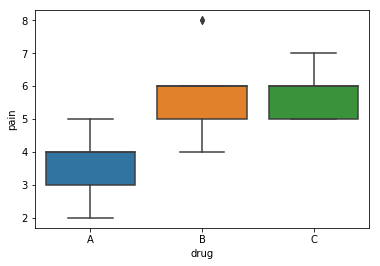

In [36]:
sns.boxplot('drug', 'pain', data = migraine)

## Extra: Recreating ANOVA table from scratch

In [37]:
# add a column with group means of pain 
migraine['group_means'] = migraine.groupby('drug').transform('mean')
N, k = 27, 3
df_between, df_within = k-1, N-k

# sum of squares **within** treatment groups
# and total sum of squares
sum_sq_within = sum((migraine.pain - migraine.group_means)**2)
sum_sq_total = sum((migraine.pain - np.mean(migraine.pain))**2)

# the between sum of squares is just the diff betweeen total and within sum of squares
sum_sq_between = sum_sq_total - sum_sq_within

mean_sq_between, mean_sq_within = sum_sq_between/df_between, sum_sq_within/df_within

F_stat = mean_sq_between/mean_sq_within

# right-tailed hypothesis test - are the means within each of the groups the 
# same as the population mean? > 1 if different. 
p_value = 1 - f.cdf(F_stat, dfn = df_between, dfd = df_within)

In [38]:
# sum_sq_between - the between-group variation - is the 'explained' sum of squares
# this metric is known as the r-squared
sum_sq_between / sum_sq_total

0.4980392156862749

In [39]:
1 - sum_sq_within/sum_sq_total

0.49803921568627485

In [40]:
pd.DataFrame([[df_between, sum_sq_between, mean_sq_between, F_stat, p_value], [df_within, sum_sq_within, mean_sq_within, np.nan, np.nan]])

0          1          2         3         4
0   2  28.222222  14.111111  11.90625  0.000256
1  24  28.444444   1.185185       NaN       NaN

## Multiple testing 
Knowing that the means of A, B and C are not equal, we might want to know which pairs of drugs have different levels of pain. You could do a series of pairwise t-tests, i.e. 

In [41]:
p_AB = ttest_ind(pain_A, pain_B, equal_var=False)[1]
p_BC = ttest_ind(pain_B, pain_C, equal_var=False)[1]
p_AC = ttest_ind(pain_A, pain_C, equal_var=False)[1]

In [42]:
ttest_ind(pain_A, pain_B)

Ttest_indResult(statistic=-3.690886276957604, pvalue=0.0019801138050275836)

However, we have to correct for multiple testing. The more tests you run, the more likely you'll incorrectly find a significant result in any one pair of results by chance alone. The Bonferroni correction simply sets the significance threshold to be $$\alpha/m$$ where $m$ is the number of hypotheses tested, and $\alpha$ is the level of significance. 

In our case, 3 hypotheses are being tested, so divide alpha by 3 to obtain 0.167. Compare this against our array of p-values: 

In [43]:
np.array([p_AB, p_BC, p_AC]), np.array([p_AB, p_BC, p_AC]) < .05/3

(array([2.75136564e-03, 8.45552356e-01, 3.32594232e-05]),
 array([ True, False,  True]))

which shows a significant difference between groups A and B and groups A and C but not groups A and C. 

`statsmodels.sandbox.stats.multicomp.multipletests` is a convenient wrapper function for this procedure. It returns four objects, but we'll focus on three: 

In [44]:
from statsmodels.sandbox.stats.multicomp import multipletests
reject, pvals_corrected, _, alphaBonferroni  = multipletests([p_AB, p_BC, p_AC], alpha = .05, method='bonferroni')

The first object returned, `reject`, provides the result of the multiple testing without the p-values: 

In [45]:
reject

array([ True, False,  True])

Should you want to compare the p-values against the original level of alpha, it is equivalent to correct the p-values by multiplying the p-values by the number of hypotheses being tested: 

In [46]:
pvals_corrected

array([8.25409692e-03, 1.00000000e+00, 9.97782696e-05])

`multipletests` also returns the Bonferroni-corrected level of alpha: 

In [47]:
np.array([p_AB, p_BC, p_AC]), np.array([p_AB, p_BC, p_AC]) < alphaBonferroni

(array([2.75136564e-03, 8.45552356e-01, 3.32594232e-05]),
 array([ True, False,  True]))

## C ---> C<a name="ctoc"></a>

The last three procedures that we studied (two-sampled t, paired t, and ANOVA) all involve the relationship between a categorical explanatory variable, $x$, and a quantitative response variable, $y$. Next, we will consider inferences about the relationship between two categorical variables.

### Chi-square test for equality of proportions in two samples <a name="chisq"></a>

For the test of proportion to be valid, we generally need the following:

- For a right- or left-tailed test, a minimum of 10 successes and 10 failures in each group are necessary. 
- Two-tailed tests are more robust and require only a minimum of 5 successes and 5 failures in each group 




<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
A researcher wants to know if there's a relationship between gender and drunk-driving. She samples a total of 619 drivers under 20 years of age in a roadside survey.

$x$: Driver gender (Male/Female) 

$y$: Driver alcohol (Yes/No)
</div>

**Step 1**: Stating the hypotheses
- $H_0:$ There is no relationship between the two categorical variables. (They are independent.)
- $H_a:$ There is a relationship between the two categorical variables. (They are not independent.)

**Step 2**: Checking the Conditions and Calculating the Test Statistic

![](../images/AlcoGen.png)
![](../images/AlcoGenPerc.png)

For the 619 sampled drivers, a larger percentage of males were found to be drunk than females (16.0% vs. 11.6%). Our data, in other words, provide some evidence that drunk driving is related to gender; however, this in itself is not enough to conclude that such a relationship exists in the larger population of drivers under 20. We need to further investigate the data and decide between the following two positions:

* The evidence provided by the roadside survey (16% vs 11.6%) is strong enough to conclude (beyond a reasonable doubt) that it must be due to a relationship between drunk driving and gender in the population of drivers under 20.
* The evidence provided by the roadside survey (16% vs. 11.6%) is not strong enough to make that conclusion, and could have happened just by chance, due to sampling variability, and not necessarily because a relationship exists in the population.

These two different conclusions can be condensed into the two hypotheses below: 

- $H_0:$ Drunk driving and gender are independent
- $H_a:$ Drunk driving and gender are not independent

Algebraically, independence between gender and driving drunk is equivalent to having equal proportions who drank (or did not drink) for males vs. females. In fact, the null and alternative hypotheses could have been re-formulated as

- $H_0:$ proportion of male drunk drivers = proportion of female drunk drivers
- $H_a:$ proportion of male drunk drivers ≠ proportion of female drunk drivers

Applying the rule to the first (top left) cell, if driving drunk and gender were independent then:

$P(drunk\, and\, male) = P(drunk) * P(male)$

$P(drunk) = 93 / 619$

$P(male) = 481 / 619$

$P(drunk\, and \,male) = (93 / 619)*(481 / 619)$

Therefore, since there are total of 619 drivers, if drunk driving and gender were independent, the count of drunk male drivers that I would expect to see is:

**Number of drunk Men** = 619* P(drunk and male) = $619 * \frac {93}{619} * \frac {481}{619}$

Similarly:

**Number of drunk Women** = 619* P(drunk and female) = $619 * \frac {93}{619} * \frac {138}{619}$



![](../images/ExpObs.png)

$$\chi^2=\Sigma_{all\_cells}\frac{(Observed\,Count-Expected\,Count)^2}{Expected\,Count}$$

The p-value obtained can be interpreted as the probability of observing a $\chi^2$ test statistic at least as large as the one observed if drunk driving and gender are independent. 

**Step 3**: Given two categorical variables $x$ and $y$, the p-value can be found as:

```python
1 - chi2.cdf(chi2_stat, df)
``` 

where `chi2_stat` is the $\chi^2$ test statistic, and $df = (n_A-1)(n_B-1)$ where `n_A` is the number of categories in $x$ and `n_B` is the number of categories in $y$.



<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
An ice cream shop wants to know whether men and women have different preferences for eating their ice cream out of a cone or a bowl. They take a sample of 500 customers (240 men and 260 women) and ask if they prefer cones over bowls. They found that 124 men preferred cones and 90 women preferred cones. Is there a difference in preference between men and women?
    </div>

In [48]:
observed = pd.DataFrame({
    'IceCream': np.repeat(['cones', 'bowl', 'cones', 'bowl'], repeats=[124, 116, 90, 170]),
    'Gender': np.repeat(['male', 'female'], repeats = [240, 260])
})

`pd.crosstab` returns a contingency table: 

In [49]:
cont_table = pd.crosstab(observed.Gender, observed.IceCream)
cont_table

IceCream  bowl  cones
Gender               
female     170     90
male       116    124

Let us work through this slowly to understand the concept of expected counts. Recall that the table of expected counts is what you would expect in each cell of the contingency table if each of the categorical variables of interest were independent, i.e. $$\Pr(A \cap B)=\Pr(A)\times \Pr(B)$$

If you were to get the number of events where $A \cap B$, multiply the number of events A and B and divide by the total number of events. (Multiply both sides of the equation by the number of elements in the contingency table, and this should become clear.)

In [50]:
icecream_probs = observed.IceCream.value_counts() 
gender_probs = observed.Gender.value_counts()

names = [(i, j) for j in gender_probs.index for i in icecream_probs.index]
exp_list = [(i * j)/500 for j in gender_probs for i in icecream_probs]

list(zip(names, exp_list))

[(('bowl', 'female'), 148.72),
 (('cones', 'female'), 111.28),
 (('bowl', 'male'), 137.28),
 (('cones', 'male'), 102.72)]

This process is tedious. Fortunately, `scipy.stats.contingency` has an `expected_freq` function that simplifies this: 

In [51]:
obs = cont_table.values
from scipy.stats.contingency import expected_freq
exp = expected_freq(cont_table)
exp

array([[148.72, 111.28],
       [137.28, 102.72]])

Calculate the chi-square test statistic: 
$$\chi^2=\Sigma_{all\_cells}\frac{(Observed\,Count-Expected\,Count)^2}{Expected\,Count}$$

In [52]:
chi2_stat = np.sum((((obs-exp)**2)/exp))

Notice that the chi-square test statistic quantifies how far away the observed counts are from the expected counts. This makes it similar to the 'greater than' (Case 2) hypotheses tests, and therefore makes it a one-tailed test. The chi-square test has $(r-1)(c-1)$ degrees of freedom. 

In [53]:
r, c = 2, 2
df = (r-1)*(c-1)

The p-value, under the null of independence, is calculated as

In [54]:
from scipy.stats import chi2
1 - chi2.cdf(chi2_stat, df)

0.00011818751702752373

Alternately, you can use the observed and expected values to run the chi-square test of independence using the `chisquare` function from `scipy.stats`. 

In [55]:
from scipy.stats import chisquare
_, p = chisquare(obs.ravel(), exp.ravel(), ddof=sum(obs.shape)-2)
p

0.00011818751702751207


The `ravel()` method is needed because without it, `chisquare` will calculate the chi-square statistic for each column. 
 
`scipy.stats.chisquare` takes a **delta** degrees of freedom (ddof) parameter. This is a bit tricky to characterise. Recall that the degrees of freedom of the test of indepdence is $$df = (r-1)(c-1)$$ where $r$ is the number of rows, and $c$ is the number of columns. 

`chisquare` uses a chi-square distribution with $k-1-ddof$ degrees of freedom, where $k = rc$, the number of frequencies observed. With a bit of algebraic manipulation, we obtain ddof as $r+c-2$.  

$$(r-1)(c-1)=rc-r-c+1= rc-(r+c-2)-2+1=rc-1-(r+c-2)$$

`scipy.stats.chisquare` returns the chi-square statistic and the p-value. 

Everything we've done previously can be done in one step on our contingency table using the `scipy.stats.chi2_contingency` function. 

In [56]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(cont_table, correction=False)
p

0.00011818751702751207

In [57]:
dof

1

In [58]:
expected

array([[148.72, 111.28],
       [137.28, 102.72]])

In [59]:
stat

14.821387574802383

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
    
**Risk Factors for Low Birth Weight**
    
Low birth weight is an outcome that has been of concern to physicians for years. This is due to the fact that infant mortality rates and birth defect rates are very high for babies with low birth weight. A woman's behavior during pregnancy (including diet, smoking habits, and obtaining prenatal care) can greatly alter her chances of carrying the baby to term and, consequently, of delivering a baby of normal birth weight. 

In this exercise, we will use a 1986 study (Hosmer and Lemeshow (2000), Applied Logistic Regression: Second Edition) in which data were collected from 189 women (of whom 59 had low birth weight infants) at the Baystate Medical Center in Springfield, MA (an academic, research, and teaching hospital that serves as the western campus of Tufts University School of Medicine and is the only Level 1 trauma center in western Massachusetts). The goal of the study was to identify risk factors associated with giving birth to a low birth weight baby.

**Variables:**

- LOW: Low birth weight (0=No (birth weight >= 2500 g) 1=Yes (birth weight < 2500 g)
- AGE: Age of mother (in years)
- LWT: Weight of mother (in pounds)
- RACE: Race of mother (1=White, 2=Black, 3=Other)
- SMOKE: Smoking status during pregnancy (0=No, 1=Yes)
- PTL: History of premature labor (0=None, 1=One, etc.)
- HT: History of hypertension (0=No, 1=Yes)
- FTV: Number of physician visits during the first trimester
- BWT: The actual birth weight (in grams)

**Question:**
- Q1. Do the data provide evidence that the occurrence of low birth weight is significantly related to whether or not the mother smoked during pregnancy?

    </div>

In [75]:
Birth = pd.read_csv('../data/low_birth_weight.csv')
Birth.head()

LOW  AGE  LWT  RACE  SMOKE  PTL  HT  FTV   BWT
0    0   29  140     1      1    0   0    2  2977
1    0   32  132     1      0    0   0    4  3080
2    0   36  175     1      0    0   0    0  3600
3    0   25  130     1      0    0   0    2  4153
4    0   26  168     2      1    0   0    0  2920

In [76]:
#Question1:
cont_table1 = pd.crosstab(Birth.LOW, Birth.SMOKE)
cont_table1

SMOKE   0   1
LOW          
0      86  44
1      29  30

In [77]:
stat1, p_value1, dof1, expected1 = chi2_contingency(cont_table1, correction=False)

In [78]:
p_value1

0.026490642530502487

In [79]:
stat1

4.923705434361292

In [80]:
if p_value1 < alpha: 
    print('p_value = {}.  There IS significant relationship between low birth weight and mother smoking habit'.format(round(p_value1,7)))
else:
    print('p_value = {}, There IS NOT relationship between low birth weight and mother smoking habit'.format(round(p_value1,7)))

p_value = 0.0264906.  There IS significant relationship between low birth weight and mother smoking habit


<div class = "alert alert-block alert-warning">
<b>Exercise</b>
<p>
Answer Questions 2-4:
    
- Q2. Do the results of the study provide significant evidence that the race of the mother is a factor in the occurrence of low birth weight?

- Q3. Are there significant differences in age between mothers who gave birth to low weight babies and those whose baby's weight was normal?

- Q4. Are there significant relationship between the actual birth weight and the race of the mother?


</div>

In [81]:
# MC
#Question2:

cont_table2 = pd.crosstab(Birth.LOW, Birth.RACE)
print(cont_table2)
stat2, p_value2, dof2, expected2 = 
      chi2_contingency(cont_table2, correction=False)

if p_value2 < alpha: 
    print('\np_value = {}.  There IS significant relationship between low birth weight and mother race'.format(round(p_value2,7)))
else:
    print('\np_value = {}, There IS NOT relationship between low birth weight and mother race'.format(round(p_value2,7)))

RACE   1   2   3
LOW             
0     73  15  42
1     23  11  25

p_value = 0.0818877, There IS NOT relationship between low birth weight and mother race


In [82]:
# MC
#Question3:
sample1=Birth.loc[Birth.LOW==0, 'AGE']
sample2=Birth.loc[Birth.LOW==1, 'AGE']
print(sample1.head())
print(sample2.head())

p_value3 = ttest_ind(sample1, sample2, equal_var=False)[1]
if p_value3 < alpha: 
    print('\np_value = {}.  There IS significant relationship between low birth weight and mother age'.format(round(p_value3,7)))
else:
    print('\np_value = {}, There IS NOT relationship between low birth weight and mother age'.format(round(p_value3,7)))

0    29
1    32
2    36
3    25
4    26
Name: AGE, dtype: int64
130    14
131    32
132    26
133    25
134    24
Name: AGE, dtype: int64

p_value = 0.07834, There IS NOT relationship between low birth weight and mother age


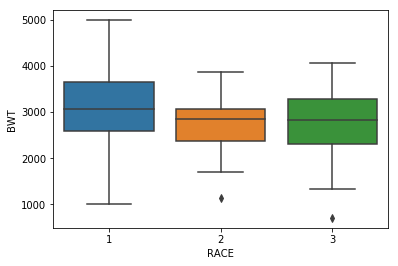

In [83]:
# MC
#Question4:
sns.boxplot('RACE', 'BWT', data = Birth)

In [84]:
# MC
Race_1 = Birth.loc[Birth.RACE == 1, 'BWT']
Race_2 = Birth.loc[Birth.RACE == 2, 'BWT']
Race_3 = Birth.loc[Birth.RACE == 3, 'BWT']
Race_1.head()

0    2977
1    3080
2    3600
3    4153
5    3460
Name: BWT, dtype: int64

In [85]:
# MC
f_stat, p_value = f_oneway(Race_1, Race_2, Race_3)
print('f_stat = ', f_stat)
print('p_value = ', p_value)

f_stat =  4.971894410448425
p_value =  0.007879055861064493


In [86]:
# MC
p_12 = ttest_ind(Race_1, Race_2, equal_var=False)[1]
p_23 = ttest_ind(Race_2, Race_3, equal_var=False)[1]
p_13 = ttest_ind(Race_1, Race_3, equal_var=False)[1]

In [87]:
# MC
print(np.array([p_12, p_23, p_13]))
print(np.array([p_12, p_23, p_13]) < .05/3)

[0.01148881 0.58430968 0.01028043]
[ True False  True]


In [88]:
# MC

# Overal Exploratory Data Analysis (Descriptive Statistics) on Birth Dataset
#1. Data Types
Birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 9 columns):
LOW      189 non-null int64
AGE      189 non-null int64
LWT      189 non-null int64
RACE     189 non-null category
SMOKE    189 non-null int64
PTL      189 non-null int64
HT       189 non-null int64
FTV      189 non-null int64
BWT      189 non-null int64
dtypes: category(1), int64(8)
memory usage: 12.2 KB


In [101]:
# MC
# Fix Data Types
CategoricalColNames = ['LOW', 'RACE', 'SMOKE', 'PTL', 'HT']
NumericalColNames =list( set(Birth.columns)-set(CategoricalColNames))
print('Categorical Columns',CategoricalColNames)
print('Numerical Columns',NumericalColNames)
Birth[CategoricalColNames] = Birth[CategoricalColNames].astype('category')
Birth[NumericalColNames] = Birth[NumericalColNames].astype('int')
Birth.info()

Categorical Columns ['LOW', 'RACE', 'SMOKE', 'PTL', 'HT']
Numerical Columns ['FTV', 'LWT', 'AGE', 'BWT']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 9 columns):
LOW      189 non-null category
AGE      189 non-null int64
LWT      189 non-null int64
RACE     189 non-null category
SMOKE    189 non-null category
PTL      189 non-null category
HT       189 non-null category
FTV      189 non-null int64
BWT      189 non-null int64
dtypes: category(5), int64(4)
memory usage: 7.5 KB


In [102]:
# MC
Birth.describe()

AGE         LWT         FTV          BWT
count  189.000000  189.000000  189.000000   189.000000
mean    23.238095  129.814815    0.793651  2944.656085
std      5.298678   30.579380    1.059286   729.022417
min     14.000000   80.000000    0.000000   709.000000
25%     19.000000  110.000000    0.000000  2414.000000
50%     23.000000  121.000000    0.000000  2977.000000
75%     26.000000  140.000000    1.000000  3475.000000
max     45.000000  250.000000    6.000000  4990.000000

In [103]:
# MC
Birth.describe(include='category')

LOW  RACE  SMOKE  PTL   HT
count   189   189    189  189  189
unique    2     3      2    4    2
top       0     1      0    0    0
freq    130    96    115  159  177

Number of categories in column LOW
 [0, 1]
Categories (2, int64): [0, 1]

************************************************

Number of members in each category in column LOW 

 0    130
1     59
Name: LOW, dtype: int64

************************************************

Proportions in each category in column LOW

 0    68.783069
1    31.216931
Name: LOW, dtype: float64


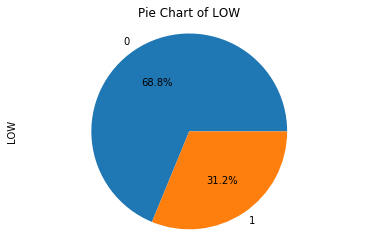

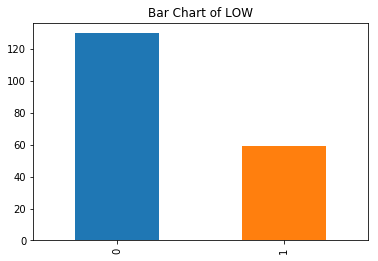

In [113]:
# MC
#Explore Categorical Variables
# LOW
print('Number of categories in column LOW\n',Birth.LOW.unique())
print('\n************************************************\n')
print('Number of members in each category in column LOW \n\n',Birth.LOW.value_counts())
print('\n************************************************\n')
print('Proportions in each category in column LOW\n\n',Birth.LOW.value_counts(normalize=True)*100)
import matplotlib.pyplot as plt
Birth.LOW.value_counts().plot.pie(autopct='%1.1f%%',title = "Pie Chart of LOW")
plt.axis('equal')
plt.show()
Birth.LOW.value_counts().plot.bar(title = "Bar Chart of LOW")
plt.show()

Number of categories in column RACE
 [1, 2, 3]
Categories (3, int64): [1, 2, 3]

************************************************

Number of members in each category in column RACE 

 1    96
3    67
2    26
Name: RACE, dtype: int64

************************************************

Proportions in each category in column RACE

 1    50.793651
3    35.449735
2    13.756614
Name: RACE, dtype: float64


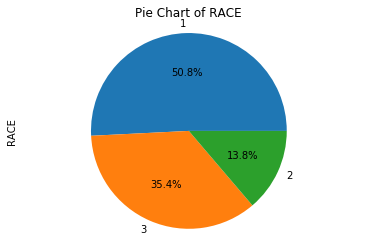

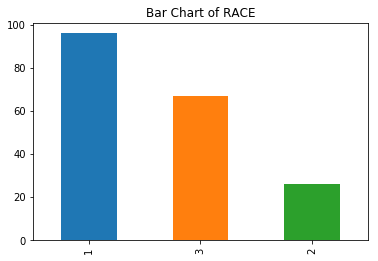

In [114]:
# MC
#Explore Categorical Variables
# RACE
print('Number of categories in column RACE\n',Birth.RACE.unique())
print('\n************************************************\n')
print('Number of members in each category in column RACE \n\n',Birth.RACE.value_counts())
print('\n************************************************\n')
print('Proportions in each category in column RACE\n\n',Birth.RACE.value_counts(normalize=True)*100)
import matplotlib.pyplot as plt
Birth.RACE.value_counts().plot.pie(autopct='%1.1f%%',title = "Pie Chart of RACE")
plt.axis('equal')
plt.show()
Birth.RACE.value_counts().plot.bar(title = "Bar Chart of RACE")
plt.show()

In [ ]:
# MC 
#Explore Numerical Variables
#Explore Relationships between Variables
